[array([[5, 4, 4, ..., 3, 4, 2],
       [5, 4, 5, ..., 3, 3, 3],
       [4, 5, 4, ..., 4, 5, 3],
       ...,
       [4, 5, 5, ..., 5, 5, 5],
       [5, 5, 6, ..., 5, 7, 4],
       [4, 7, 5, ..., 5, 4, 4]], dtype=uint8), 0]
Epoch 1/4
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 98s 93ms/step - accuracy: 0.8728 - loss: 0.3998 - val_accuracy: 1.0000 - val_loss: 5.5040e-04
Epoch 2/4
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 75s 75ms/step - accuracy: 0.9992 - loss: 0.0026 - val_accuracy: 1.0000 - val_loss: 6.9154e-05
Epoch 3/4
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 74s 74ms/step - accuracy: 0.9999 - loss: 6.5608e-04 - val_accuracy: 1.0000 - val_loss: 3.0866e-05
Epoch 4/4
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 81s 81ms/step - accuracy: 0.9999 - loss: 1.6190e-04 - val_accuracy: 1.0000 - val_loss: 1.2322e-05


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 48, 48, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 48, 48, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 46, 46, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 46, 46, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 16928)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       4,333,824 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,691,926 (33.16 MB)

 Trainable params: 4,345,962 (16.58 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,345,964 (16.58 MB)

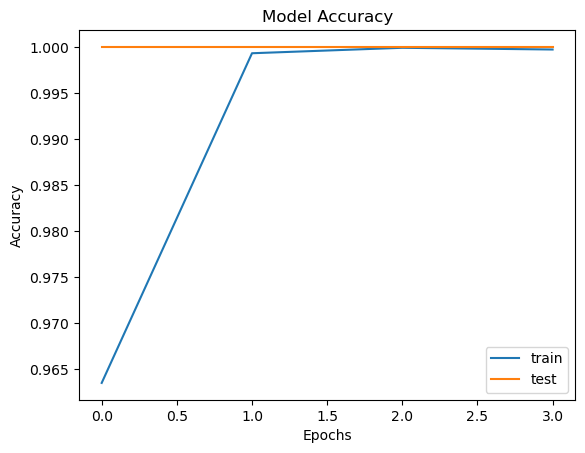

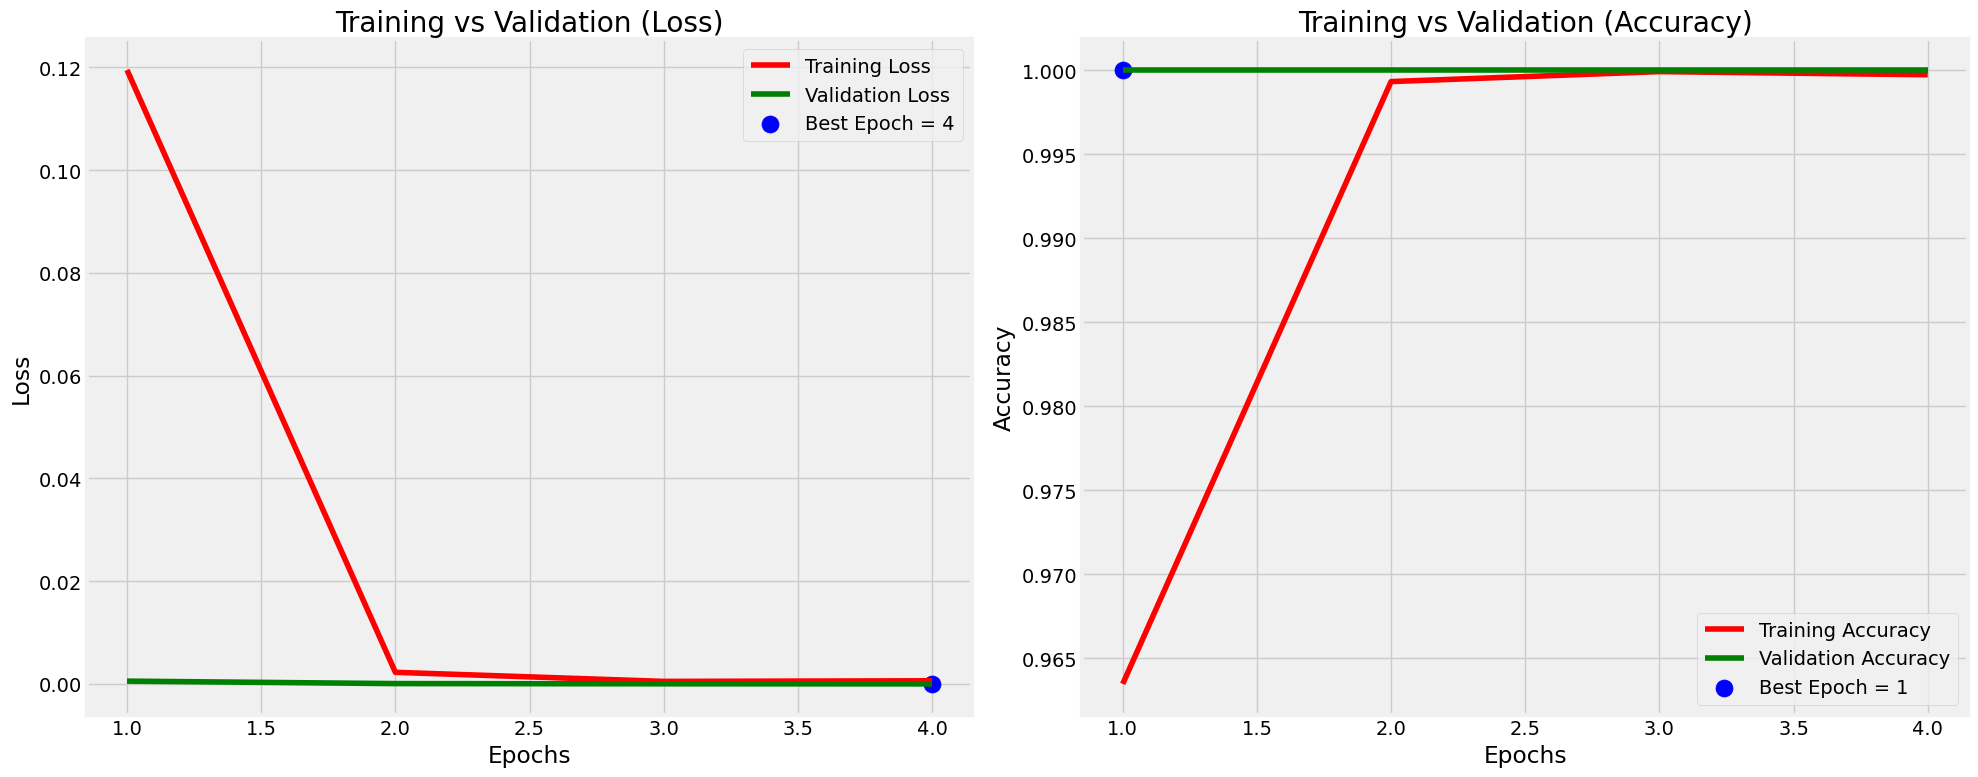

250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 1.0000 - loss: 1.0725e-05
Test accuracy: 100.00%


In [1]:
import warnings
warnings.filterwarnings('ignore')

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, Activation, MaxPool2D, Dense, Flatten, Dropout
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Categories
CATEGORIES = ["01_palm", '02_l', '03_fist', '04_fist_moved', '05_thumb', '06_index', '07_ok', '08_palm_moved', '09_c', '10_down']
IMG_SIZE = 50

# Data path
data_path = r"C:\Users\lenovo\Downloads\PRODIGY ML\HAND GESTURE\leapGestRecog\leapGestRecog"

# Preparing the data
image_data = []

for dr in os.listdir(data_path):
    dr_path = os.path.join(data_path, dr)
    if not os.path.isdir(dr_path):
        continue
    for category in CATEGORIES:
        path = os.path.join(dr_path, category)
        if not os.path.isdir(path):
            continue
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                if img_arr is not None:
                    resized_img = cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE))
                    image_data.append([resized_img, CATEGORIES.index(category)])
            except Exception as e:
                print(f"Failed to process image {img} in {path}: {e}")
                pass

# Check the first data entry
if image_data:
    print(image_data[0])
else:
    print("No image data found.")

# Shuffle the data
import random
random.shuffle(image_data)

# Splitting data into features and labels
input_data = []
label = []

for features, label_value in image_data:
    input_data.append(features)
    label.append(label_value)

# Convert to numpy arrays and normalize
input_data = np.array(input_data) / 255.0
label = np.array(label)

# Reshape input data
input_data = input_data.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

# Convert labels to categorical
label = to_categorical(label)

# Split data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(input_data, label, test_size=0.2, random_state=42, shuffle=True)

# Model definition
model = Sequential([
    Conv2D(filters=32, kernel_size=(3,3), input_shape=(IMG_SIZE, IMG_SIZE, 1)),
    Activation('relu'),
    Conv2D(filters=32, kernel_size=(3,3)),
    Activation('relu'),
    MaxPool2D(pool_size=(2,2)),
    Dropout(0.3),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# Training the model
history = model.fit(X_train, y_train, epochs=4, batch_size=32, validation_data=(X_test, y_test))

# Model summary
model.summary()

# Plotting accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

# Detailed training and validation plots
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

index_loss = np.argmin(val_loss)
index_acc = np.argmax(val_acc)

val_lowest = val_loss[index_loss]
val_highest = val_acc[index_acc]

Epochs = [i+1 for i in range(len(train_acc))]

loss_label = f'Best Epoch = {str(index_loss + 1)}'
acc_label = f'Best Epoch = {str(index_acc + 1)}'

plt.figure(figsize=(20,8))
plt.style.use('fivethirtyeight')

plt.subplot(1,2,1)
plt.plot(Epochs, train_loss, 'r', label='Training Loss')
plt.plot(Epochs, val_loss, 'g', label='Validation Loss')
plt.scatter(index_loss + 1, val_lowest, s=150, c='blue', label=loss_label)
plt.title('Training vs Validation (Loss)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(Epochs, train_acc, 'r', label='Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label='Validation Accuracy')
plt.scatter(index_acc + 1, val_highest, s=150, c='blue', label=acc_label)
plt.title('Training vs Validation (Accuracy)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print('Test accuracy: {:2.2f}%'.format(test_accuracy*100))

# Save the model in Keras format
model.save('gesture_recognition_model.keras')
